In [27]:
# !pip install folium

In [1]:
import pandas as pd 
import folium

In [3]:

drivers = pd.read_csv("https://raw.githubusercontent.com/terrydiko/INST447Project/main/Drivers.csv", encoding='utf-8', dtype="str")
drivers

,report_number,driver_at_fault,speed_limit,vehicle_year
0,MCP3239001B,Yes,15,2006
1,MCP3290000G,Yes,40,2006
2,MCP3283000M,Yes,30,2018
3,MCP2892009B,No,35,2013
4,MCP2892009B,Yes,35,0
...,...,...,...,...
123287,MCP2783000G,No,40,2002
123288,MCP2686000D,No,40,2007
123289,MCP2686000D,Yes,40,2010
123290,MCP11520005,Yes,35,2008


In [4]:
incidents = pd.read_csv("https://raw.githubusercontent.com/terrydiko/INST447Project/main/Incidents.csv", encoding= 'utf-8', dtype="str")
incidents

,report_number,agency_name,acrs_report_type,crash_date_time,direction,weather,latitude,longitude
0,MCP3239001B,Montgomery County Police,Injury Crash,2021-04-28T21:09:00.000,NaN,CLEAR,39.04605063,-76.99075732
1,MCP3290000G,Montgomery County Police,Property Damage Crash,2021-04-28T21:01:00.000,South,CLEAR,39.059336,-76.944363
2,MCP3283000M,Montgomery County Police,Property Damage Crash,2021-04-28T20:37:00.000,East,CLEAR,39.0471,-77.225175
3,MCP2892009B,Montgomery County Police,Property Damage Crash,2021-04-28T17:58:00.000,South,CLEAR,39.01532,-77.042505
4,MCP2899004S,Montgomery County Police,Property Damage Crash,2021-04-28T17:34:00.000,South,CLEAR,39.139095,-77.26846667
...,...,...,...,...,...,...,...,...
69553,MCP23000002,Montgomery County Police,Property Damage Crash,2015-01-01T02:00:00.000,North,CLEAR,39.148678,-77.093848
69554,MCP2674000D,Montgomery County Police,Property Damage Crash,2015-01-01T01:26:00.000,North,CLEAR,39.158059,-77.204349
69555,MCP2783000G,Montgomery County Police,Injury Crash,2015-01-01T01:14:00.000,East,CLEAR,39.09621667,-77.10980333
69556,MCP2686000D,Montgomery County Police,Property Damage Crash,2015-01-01T01:10:00.000,South,NaN,39.19661,-77.26554667


In [6]:
merge_data = incidents.merge(drivers, on='report_number', how='inner')
merge_data["vehicle_year"] = merge_data["vehicle_year"].apply(lambda x : int(x))
merge_data = merge_data.dropna()
merge_data = merge_data.query("vehicle_year >= 1960 and vehicle_year <= 2021")
merge_data = merge_data.query("direction != 'Unknown'")
merge_data = merge_data.query("weather not in ['OTHER','UNKNOWN']")

merge_data
# Project Focus/Goal
# What factors have the biggest influence in car accidents?
# Factors: Year of Vehicle, Time of Accident, Weather, Number of Lanes, Speed Limit


,report_number,agency_name,acrs_report_type,crash_date_time,direction,weather,latitude,longitude,driver_at_fault,speed_limit,vehicle_year
1,MCP3290000G,Montgomery County Police,Property Damage Crash,2021-04-28T21:01:00.000,South,CLEAR,39.059336,-76.944363,Yes,40,2006
2,MCP3283000M,Montgomery County Police,Property Damage Crash,2021-04-28T20:37:00.000,East,CLEAR,39.0471,-77.225175,Yes,30,2018
3,MCP2892009B,Montgomery County Police,Property Damage Crash,2021-04-28T17:58:00.000,South,CLEAR,39.01532,-77.042505,No,35,2013
5,MCP2899004S,Montgomery County Police,Property Damage Crash,2021-04-28T17:34:00.000,South,CLEAR,39.139095,-77.26846667,Yes,55,2015
6,MCP2864003Y,Montgomery County Police,Property Damage Crash,2021-04-28T16:26:00.000,West,CLEAR,39.10029167,-77.18490833,Yes,40,2006
...,...,...,...,...,...,...,...,...,...,...,...
123285,MCP2674000D,Montgomery County Police,Property Damage Crash,2015-01-01T01:26:00.000,North,CLEAR,39.158059,-77.204349,No,35,2014
123286,MCP2783000G,Montgomery County Police,Injury Crash,2015-01-01T01:14:00.000,East,CLEAR,39.09621667,-77.10980333,Yes,40,1999
123287,MCP2783000G,Montgomery County Police,Injury Crash,2015-01-01T01:14:00.000,East,CLEAR,39.09621667,-77.10980333,No,40,2002
123290,MCP11520005,Montgomery County Police,Property Damage Crash,2015-01-01T00:30:00.000,North,CLEAR,39.02200107,-77.10267305,Yes,35,2008


In [7]:
# Vehicle Year Unique Values
sorted(merge_data["vehicle_year"].unique())

[1960,
 1963,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [8]:
# Direction Unique Values
sorted(merge_data["direction"].unique())

['East', 'North', 'South', 'West']

In [9]:
# Weather Unique Values
sorted(merge_data["weather"].unique())

['BLOWING SAND, SOIL, DIRT',
 'BLOWING SNOW',
 'CLEAR',
 'CLOUDY',
 'FOGGY',
 'RAINING',
 'SEVERE WINDS',
 'SLEET',
 'SNOW',
 'WINTRY MIX']

In [10]:
import matplotlib.pyplot as plt
import numpy as 
%matplotlib inline

In [22]:
# Vehicle Year
year = merge_data[["report_number", "vehicle_year"]]
year = year.groupby("vehicle_year").count().reset_index()
year.columns = ["vehicle_year", "num_incidents"]
year = year.sort_values(by="vehicle_year", ascending=False)
year = year.head(20).sort_values(by="vehicle_year")
year["vehicle_year"] = year["vehicle_year"].apply(lambda x : str(x))
year

,vehicle_year,num_incidents
38,2002,3067
39,2003,3803
40,2004,4309
41,2005,4522
42,2006,5115
43,2007,5363
44,2008,5211
45,2009,4478
46,2010,4821
47,2011,5539


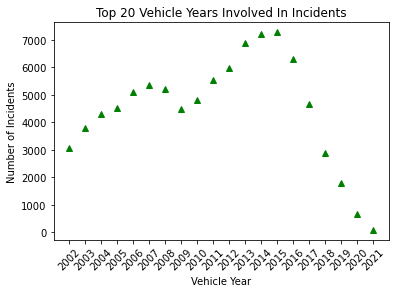

In [24]:
plt.plot(year["vehicle_year"], year["num_incidents"], 'g^')

plt.title('Top 20 Vehicle Years Involved In Incidents')
plt.xlabel('Vehicle Year')
plt.ylabel('Number of Incidents')

plt.xticks(rotation=45)
plt.show()

In [27]:
# Weather
weather = merge_data[["report_number", "weather"]]
weather = weather.groupby("weather").count().reset_index()
weather.columns = ["weather", "num_incidents"]
weather = weather.sort_values(by="weather")
weather

,weather,num_incidents
0,"BLOWING SAND, SOIL, DIRT",15
1,BLOWING SNOW,91
2,CLEAR,72849
3,CLOUDY,11725
4,FOGGY,460
5,RAINING,14133
6,SEVERE WINDS,106
7,SLEET,171
8,SNOW,1151
9,WINTRY MIX,334


In [43]:
fig, ax = plt.subplots()

width = 0.75
ind = np.arange(len(weather["num_incidents"]))
ax.barh(weather["weather"], weather["num_incidents"], width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(weather["num_incidents"]):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.title('Top 20 Vehicle Years Involved In Incidents')
plt.xlabel('Vehicle Year')
plt.ylabel('Number of Incidents')

plt.xticks(rotation=90)
plt.show()

NameError: name 'x' is not defined

In [10]:
#x_y = []
#for index in range(0, len(incidents['Y'])):
#    x_y.append([float(incidents['Y'][index]), float(incidents['X'][index])])
#x_y[:10]

In [11]:
#m = folium.Map(location=[38.86948278, -76.96897301], default_zoom_start=200)

#for xy in x_y:
#    folium.Marker(location=xy, popup='You found a crash').add_to(m)

#m

In [10]:
enforment = merge_crash[['ENFORCEMENT', 'TODATE']].groupby('ENFORCEMENT').agg('count').reset_index()
enforment.columns = ['ENFORCEMENT', 'Number-of-Accident']
enforment

,ENFORCEMENT,Number-of-Accident
0,OVERSIZED SAFETY CAMERA,2
1,RED LIGHT SAFETY CAMERA,1027
2,SPEED SAFETY CAMERA,255
3,STOP SIGN SAFETY CAMERA,10
